In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Data penjualan.xlsx")

In [3]:
df.shape

(64816, 17)

# Pembersihan Data

## Membuang Missing Value

In [4]:
df.isnull().any().sum()

0

Tidak ada missing value di data set

## Membuang Data Terduplikasi

In [5]:
df.duplicated(keep=False).sum()

40

Terdapat 40 data yang terduplikasi di data set, maka kita akan membuang 20 data terduplikat dan mempertahankan 20 data yang lain yang ter-input pertama kali

In [6]:
df.drop_duplicates(keep="first", inplace=True)

In [7]:
df.duplicated().sum()

0

There is no longer a duplicate

## Mengelola data outliers

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64796 entries, 0 to 64815
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tanggal Transaksi  64796 non-null  datetime64[ns]
 1   Tahun Fiskal       64796 non-null  object        
 2   Pabrikan           64796 non-null  object        
 3   Kota               64796 non-null  object        
 4   Provinsi           64796 non-null  object        
 5   Manager            64796 non-null  object        
 6   Kategori           64796 non-null  object        
 7   Pembeli            64796 non-null  object        
 8   Sales              64796 non-null  int64         
 9   Level Karyawan     64796 non-null  object        
 10  Income             64796 non-null  object        
 11  Status Pernikahan  64796 non-null  object        
 12  Usia               64796 non-null  int64         
 13  Cara Pembayaran    64796 non-null  object        
 14  Tenor 

In [9]:
df["Sales"].unique()

array([ 975000000, 1800000000, 1200000000,  700000000,  560000000,
        524000000,  350000000,  475000000], dtype=int64)

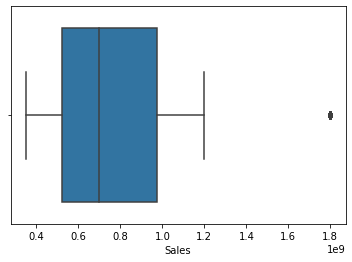

In [10]:
sns.boxplot(x="Sales", data=df)

plt.show()

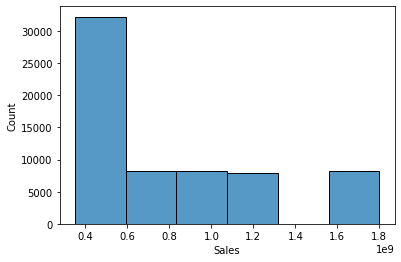

In [11]:
sns.histplot(x="Sales", data=df, bins=6)

plt.show()

In [12]:
df["Sales"].describe()

count    6.479600e+04
mean     8.243121e+08
std      4.530488e+08
min      3.500000e+08
25%      5.240000e+08
50%      7.000000e+08
75%      9.750000e+08
max      1.800000e+09
Name: Sales, dtype: float64

In [13]:
q1 = df["Sales"].quantile(0.25)
q3 = df["Sales"].quantile(0.75)
iqr = q3 - q1

lower_q = df["Sales"] < q1 - (1.5*iqr)
upper_q = df["Sales"] > q3 + (1.5*iqr)

outliers_cnt = len(df[lower_q | upper_q])
print("Jumlah outliers di data set: ", outliers_cnt)

Jumlah outliers di data set:  8184


In [14]:
sales_max = len(df[df["Sales"] == df["Sales"].max()])
print("Jumlah data untuk nilai sales tertinggi: ", sales_max)

Jumlah data untuk nilai sales tertinggi:  8184


Terdapat 8184 outliers di data ini akan tetapi jika melihat distribusi data, nilai unik sales dan nilai statistika deskriptif maka nilai outliers ini adalah nilai semua nilai seles tertinggi yang berjumlah 8184 data, maka untuk menjaga konsistensi dari data nilai outliers ini tidak perlu diubah.

## Mengecek Konsistensi Datapoint untuk Data Kategorik

In [15]:
categorical_column = [col for col in df.columns if df[col].dtype == "O"]

In [16]:
categorical_column

['Tahun Fiskal',
 'Pabrikan',
 'Kota',
 'Provinsi',
 'Manager',
 'Kategori',
 'Pembeli',
 'Level Karyawan',
 'Income',
 'Status Pernikahan',
 'Cara Pembayaran']

In [17]:
for col in categorical_column:
    print(df[col].unique())

['2015/16' '2016/17' '2017/18']
['Jepang' 'Amerika / Eropa']
['Magelang' 'Kabupaten Rokan Hilir' 'Pekalongan' 'Kota Semarang'
 'Kabupaten Tana Toraja' 'Kota Surakarta' 'Jakarta Selatan'
 'Kabupaten Kulonprogo' 'Kota Balikpapan' 'Kota Bontang'
 'Kabupaten Pelalawan' 'Jakarta Utara' 'Rembang' 'Cirebon'
 'Kota Yogyakarta' 'Kota Pekanbaru' 'Kota Surabaya' 'Kabupaten Kampar'
 'Kabupaten Siak' 'Kepulauan Seribu' 'Kabupaten Bantul' 'Jakarta Pusat'
 'Kabupaten Indragiri Hulu' 'Kabupaten Indragiri Hilir' 'Jakarta Timur'
 'Kudus' 'Kota Makassar' 'Kabupaten Bengkalis' 'Kota Samarinda'
 'Kota Palopo' 'Kota Pare-pare' 'Kabupaten Paser' 'Jakarta Barat'
 'Kabupaten Gunung Kidul' 'Kabupaten Sleman' 'Kota Dumai' 'Ponorogo'
 'Kota Salatiga' 'Bandung' 'Wonosobo' 'Purworejo' 'Klaten' 'Kota Tegal'
 'Kota Malang' 'Kebumen']
['Jawa Tengah' 'Riau' 'Sulawesi Selatan' 'Jakarta' 'Yogyakarta'
 'Kalimantan Timur' 'Jawa Barat' 'Jawa Timur']
['Elvi Sukaesih' 'Ahmad Albar' 'Rhoma Irama' 'Titiek Puspa'
 'Ruth Sahanaya

### Mengecek Konsistensi data antar variabel

Akan ada kemungkinan salah input data untuk variabel Cara Pembayaran dan Tenor. 

Contohnya: Jika Cara Pembayaran Cash, variabel Tenor bernilai 1, 3, atau 5, sedangkan nilai Tenor yang diharapkan adalah 0 untuk pembayaran Cash. 

Sehingga nilai ini butuh dicek agar analisa lebih akurat

In [18]:
df[df["Cara Pembayaran"] == "Cash"]["Tenor"].unique()

array([0], dtype=int64)

In [19]:
df[df["Cara Pembayaran"] == "Kredit"]["Tenor"].unique()

array([3, 1, 5], dtype=int64)

Semua data sudah sesuai, semua yang membayar dengan cash mendapatkan tenor 0, sedangkan semua pembayaran dengan kredit mendapatkan tenor 1, 3, atau 5.

### Menyesuaikan Data Kota dan Kabupaten

Semua data di variabel kota yang tidak memiliki prefix akan diasumsikan sebagai suatu Kota. Selain itu untuk meringkas nama kabupaten, prefix 'Kabupaten' akan disingkat menjadi 'Kab.".

In [20]:
no_prefix = {
    "Magelang": "Kota Magelang",
    "Pekalongan": "Kota Pekalongan",
    "Rembang": "Kota Rembang",
    "Cirebon": "Kota Cirebon",
    "Kepulauan Seribu": "Kep. Seribu",
    "Kudus": "Kota Kudus",
    "Ponorogo": "Kota Ponorogo",
    "Wonosobo": "Kota Wonosobo",
    "Purworejo": "Kota Purworejo",
    "Klaten": "Kota Klaten",
    "Kebumen": "Kota Kebumen",
    "Bandung": "Kota Bandung"
}

In [21]:
kabupaten_prefix = {
    "Kabupaten Rokan Hilir": "Kab. Rokan Hilir",
    "Kabupaten Tana Toraja": "Kab.Tana Toraja ",
    "Kabupaten Kulonprogo": "Kab. Kulonprogo",
    "Kabupaten Pelalawan": "Kab. Pelalawan",
    "Kabupaten Kampar": "Kab. Kampar",
    "Kabupaten Siak": "Kab. Siak",
    "Kabupaten Bantul": "Kab. Bantul",
    "Kabupaten Indragiri Hulu": "Kab. Indragiri Hulu",
    "Kabupaten Indragiri Hilir": "Kab. Indragiri Hilir",
    "Kabupaten Bengkalis": "Kab. Bengkalis",
    "Kabupaten Paser": "Kab. Paser",
    "Kabupaten Gunung Kidul": "Kab. Gunung Kidul",
    "Kabupaten Sleman": "Kab. Sleman",
}

In [22]:
df["Kota"].replace(no_prefix, inplace=True)

# Sanity Check
df[df["Kota"] == "Kota Bandung"]

,Tanggal Transaksi,Tahun Fiskal,Pabrikan,Kota,Provinsi,Manager,Kategori,Pembeli,Sales,Level Karyawan,Income,Status Pernikahan,Usia,Cara Pembayaran,Tenor,Jumlah Keluarga,Mobil Ke
1579,2016-01-01,2015/16,Jepang,Kota Bandung,Jawa Barat,Gombloh,Jeep,Vieta Motor,1200000000,Staff,Range 1,Menikah,38,Cash,0,5,1
1588,2016-01-01,2015/16,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sedan,Audrey Mobilindo,560000000,Staff,Range 1,Not Defined,28,Cash,0,0,1
1621,2016-01-01,2015/16,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sport,Ivans Workshop,475000000,Senior Manager,Range 3,Not Defined,45,Cash,0,0,2
1704,2016-01-01,2015/16,Jepang,Kota Bandung,Jawa Barat,Gombloh,Jeep,Pluit Auto,475000000,Senior Manager,Range 3,Not Defined,47,Cash,0,0,3
1734,2016-01-01,2015/16,Jepang,Kota Bandung,Jawa Barat,Gombloh,SUV,Caesar Mobilindo,475000000,Manager,Range 2,Lajang,28,Kredit,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64713,2017-07-01,2017/18,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sedan,Prestige Image Motocars,1200000000,Staff,Range 1,Menikah,32,Kredit,3,1,1
64716,2017-07-01,2017/18,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sport,Ivans Workshop,700000000,Staff,Range 1,Menikah,36,Cash,0,1,1
64774,2017-07-01,2017/18,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sport,Ivans Workshop,700000000,Manager,Range 2,Not Defined,30,Cash,0,0,1
64797,2017-07-01,2017/18,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sport,Pluit Auto,524000000,Senior Manager,Range 3,Lajang,46,Kredit,5,0,2


In [23]:
df["Kota"].replace(kabupaten_prefix, inplace=True)

# Sanity Check
df[df["Kota"] == "Kab. Kulonprogo"]

,Tanggal Transaksi,Tahun Fiskal,Pabrikan,Kota,Provinsi,Manager,Kategori,Pembeli,Sales,Level Karyawan,Income,Status Pernikahan,Usia,Cara Pembayaran,Tenor,Jumlah Keluarga,Mobil Ke
8,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Elvi Sukaesih,Jeep,Vieta Motor,350000000,Manager,Range 2,Lajang,37,Kredit,3,0,1
17,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Elvi Sukaesih,Jeep,Vieta Motor,1800000000,Manager,Range 2,Not Defined,32,Kredit,5,0,2
27,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Melly Goeslaw,SUV,Prestige Image Motocars,1800000000,Senior Manager,Range 3,Not Defined,45,Cash,0,0,1
34,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Melly Goeslaw,Sedan,Audrey Mobilindo,1800000000,Staff,Range 1,Menikah,30,Cash,0,1,1
52,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Elvi Sukaesih,Sedan,Prestige Image Motocars,975000000,Manager,Range 2,Not Defined,33,Cash,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62320,2017-07-01,2017/18,Jepang,Kab. Kulonprogo,Yogyakarta,Melly Goeslaw,SUV,Caesar Mobilindo,700000000,Direktur,Range 4,Lajang,52,Cash,0,0,1
62338,2017-07-01,2017/18,Jepang,Kab. Kulonprogo,Yogyakarta,Melly Goeslaw,Sport,Vieta Motor,350000000,Senior Manager,Range 3,Menikah,43,Cash,0,1,2
62401,2017-07-01,2017/18,Jepang,Kab. Kulonprogo,Yogyakarta,Elvi Sukaesih,SUV,Caesar Mobilindo,1200000000,Staff,Range 1,Lajang,31,Kredit,3,0,1
62431,2017-07-01,2017/18,Jepang,Kab. Kulonprogo,Yogyakarta,Elvi Sukaesih,SUV,Caesar Mobilindo,1200000000,Direktur,Range 4,Menikah,57,Cash,0,1,1


In [24]:
data1 = df["Kota"] == "Kab. Kulonprogo"
data2 = df["Kota"] == "Kota Bandung"
df[data1 | data2]

,Tanggal Transaksi,Tahun Fiskal,Pabrikan,Kota,Provinsi,Manager,Kategori,Pembeli,Sales,Level Karyawan,Income,Status Pernikahan,Usia,Cara Pembayaran,Tenor,Jumlah Keluarga,Mobil Ke
8,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Elvi Sukaesih,Jeep,Vieta Motor,350000000,Manager,Range 2,Lajang,37,Kredit,3,0,1
17,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Elvi Sukaesih,Jeep,Vieta Motor,1800000000,Manager,Range 2,Not Defined,32,Kredit,5,0,2
27,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Melly Goeslaw,SUV,Prestige Image Motocars,1800000000,Senior Manager,Range 3,Not Defined,45,Cash,0,0,1
34,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Melly Goeslaw,Sedan,Audrey Mobilindo,1800000000,Staff,Range 1,Menikah,30,Cash,0,1,1
52,2016-01-01,2015/16,Jepang,Kab. Kulonprogo,Yogyakarta,Elvi Sukaesih,Sedan,Prestige Image Motocars,975000000,Manager,Range 2,Not Defined,33,Cash,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64713,2017-07-01,2017/18,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sedan,Prestige Image Motocars,1200000000,Staff,Range 1,Menikah,32,Kredit,3,1,1
64716,2017-07-01,2017/18,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sport,Ivans Workshop,700000000,Staff,Range 1,Menikah,36,Cash,0,1,1
64774,2017-07-01,2017/18,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sport,Ivans Workshop,700000000,Manager,Range 2,Not Defined,30,Cash,0,0,1
64797,2017-07-01,2017/18,Jepang,Kota Bandung,Jawa Barat,Gombloh,Sport,Pluit Auto,524000000,Senior Manager,Range 3,Lajang,46,Kredit,5,0,2


In [25]:
# Uncomment to save the data to the csv
# df.to_csv("data_penjualan_clean.csv")